In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 500,100
import seaborn as sns
from math import sqrt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from datetime import datetime
from datetime import date, datetime
from matplotlib import dates as mdates

In [ ]:
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/D2/US_counties_COVID19_health_weather_data.csv')

Mounted at /content/drive


In [ ]:
data.shape
num_fips = len(data['fips'].unique())
num_fips

3140

In [ ]:
covid = data[(data['fips']=='53061')]
covid.shape

(319, 227)

In [ ]:
covid.head()

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
7,2020-01-25,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23


In [ ]:
covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)
dataset = covid.set_index(['date'])
dataset.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
2020-01-25,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-25,Snohomish,Washington,53061,2297,103.0,yes,yes,48.047489,-121.697307,758649.0,...,44.600000,45.64,44.34,43.400000,45.133333,45.84,46.23,45.613333,2020-03-23,2020-03-23
2020-04-26,Snohomish,Washington,53061,2311,104.0,yes,yes,48.047489,-121.697307,758649.0,...,46.333333,44.78,44.54,43.140000,45.366667,45.60,45.99,45.446667,2020-03-23,2020-03-23
2020-04-27,Snohomish,Washington,53061,2355,106.0,yes,yes,48.047489,-121.697307,758649.0,...,46.033333,44.64,43.84,42.506667,45.166667,46.40,46.01,45.060000,2020-03-23,2020-03-23


In [ ]:
dataset = dataset[['cases','deaths','stay_at_home_announced','stay_at_home_effective','mean_temp','dewpoint','sea_level_pressure','station_pressure','visibility','wind_speed','precipitation','fog','rain','snow','mean_temp_3d_avg','mean_temp_5d_avg','mean_temp_10d_avg','mean_temp_15d_avg','dewpoint_3d_avg','dewpoint_5d_avg','dewpoint_10d_avg','dewpoint_15d_avg']]
dataset.tail(5)
dataset.shape

(319, 22)

In [ ]:
dataset.apply(lambda x: len(x.unique()))

cases                     223
deaths                    133
stay_at_home_announced      2
stay_at_home_effective      2
mean_temp                 202
dewpoint                  199
sea_level_pressure        170
station_pressure          168
visibility                 47
wind_speed                 95
precipitation              50
fog                         2
rain                        2
snow                        2
mean_temp_3d_avg          264
mean_temp_5d_avg          291
mean_temp_10d_avg         298
mean_temp_15d_avg         299
dewpoint_3d_avg           284
dewpoint_5d_avg           287
dewpoint_10d_avg          292
dewpoint_15d_avg          298
dtype: int64

In [ ]:
dataset.isnull().sum()

cases                     0
deaths                    0
stay_at_home_announced    0
stay_at_home_effective    0
mean_temp                 0
dewpoint                  0
sea_level_pressure        0
station_pressure          2
visibility                0
wind_speed                0
precipitation             4
fog                       0
rain                      0
snow                      0
mean_temp_3d_avg          1
mean_temp_5d_avg          2
mean_temp_10d_avg         5
mean_temp_15d_avg         7
dewpoint_3d_avg           1
dewpoint_5d_avg           2
dewpoint_10d_avg          5
dewpoint_15d_avg          7
dtype: int64

In [ ]:
dataset['station_pressure'] = dataset['station_pressure'].replace(0, np.NaN)
dataset['station_pressure'].fillna(dataset['station_pressure'].mean(), inplace = True)

dataset['precipitation'] = dataset['precipitation'].replace(0, np.NaN)
dataset['precipitation'].fillna(dataset['precipitation'].mean(), inplace = True)

dataset['mean_temp_3d_avg'] = dataset['mean_temp_3d_avg'].replace(0, np.NaN)
dataset['mean_temp_3d_avg'].fillna(dataset['mean_temp_3d_avg'].mean(), inplace = True)

dataset['mean_temp_5d_avg'] = dataset['mean_temp_5d_avg'].replace(0, np.NaN)
dataset['mean_temp_5d_avg'].fillna(dataset['mean_temp_5d_avg'].mean(), inplace = True)

dataset['mean_temp_10d_avg'] = dataset['mean_temp_10d_avg'].replace(0, np.NaN)
dataset['mean_temp_10d_avg'].fillna(dataset['mean_temp_10d_avg'].mean(), inplace = True)

dataset['mean_temp_15d_avg'] = dataset['mean_temp_15d_avg'].replace(0, np.NaN)
dataset['mean_temp_15d_avg'].fillna(dataset['mean_temp_15d_avg'].mean(), inplace = True)

dataset['dewpoint_3d_avg'] = dataset['dewpoint_3d_avg'].replace(0, np.NaN)
dataset['dewpoint_3d_avg'].fillna(dataset['dewpoint_3d_avg'].mean(), inplace = True)

dataset['dewpoint_5d_avg'] = dataset['dewpoint_5d_avg'].replace(0, np.NaN)
dataset['dewpoint_5d_avg'].fillna(dataset['dewpoint_5d_avg'].mean(), inplace = True)

dataset['dewpoint_10d_avg'].fillna(dataset['dewpoint_10d_avg'].mode()[0], inplace = True)

dataset['dewpoint_15d_avg'] = dataset['dewpoint_15d_avg'].replace(0, np.NaN)
dataset['dewpoint_15d_avg'].fillna(dataset['dewpoint_15d_avg'].mode()[0], inplace = True)

dataset.isnull().sum()

cases                     0
deaths                    0
stay_at_home_announced    0
stay_at_home_effective    0
mean_temp                 0
dewpoint                  0
sea_level_pressure        0
station_pressure          0
visibility                0
wind_speed                0
precipitation             0
fog                       0
rain                      0
snow                      0
mean_temp_3d_avg          0
mean_temp_5d_avg          0
mean_temp_10d_avg         0
mean_temp_15d_avg         0
dewpoint_3d_avg           0
dewpoint_5d_avg           0
dewpoint_10d_avg          0
dewpoint_15d_avg          0
dtype: int64

In [ ]:
dataset.dtypes

cases                       int64
deaths                    float64
stay_at_home_announced     object
stay_at_home_effective     object
mean_temp                 float64
dewpoint                  float64
sea_level_pressure        float64
station_pressure          float64
visibility                float64
wind_speed                float64
precipitation             float64
fog                       float64
rain                      float64
snow                      float64
mean_temp_3d_avg          float64
mean_temp_5d_avg          float64
mean_temp_10d_avg         float64
mean_temp_15d_avg         float64
dewpoint_3d_avg           float64
dewpoint_5d_avg           float64
dewpoint_10d_avg          float64
dewpoint_15d_avg          float64
dtype: object

In [ ]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataset['stay_at_home_announced']= label_encoder.fit_transform(dataset['stay_at_home_announced']) 
dataset['stay_at_home_effective']= label_encoder.fit_transform(dataset['stay_at_home_effective']) 
dataset.head(100)

,cases,deaths,stay_at_home_announced,stay_at_home_effective,mean_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,...,rain,snow,mean_temp_3d_avg,mean_temp_5d_avg,mean_temp_10d_avg,mean_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,1,0.0,0,0,44.1,40.3,1006.3,1.0,9.9,8.3,...,1.0,0.0,44.900000,46.02,45.12,42.753333,40.333333,41.64,40.74,37.973333
2020-01-22,1,0.0,0,0,44.8,40.3,1014.3,8.5,9.6,13.2,...,1.0,0.0,46.266667,47.22,46.33,44.200000,42.633333,42.98,41.68,39.440000
2020-01-23,1,0.0,0,0,49.9,47.3,1014.5,9.1,10.0,12.0,...,1.0,0.0,48.733333,47.48,46.89,44.620000,44.733333,43.72,42.47,40.120000
2020-01-24,1,0.0,0,0,51.5,46.6,1011.9,6.4,9.6,13.0,...,1.0,0.0,49.500000,48.14,47.02,45.446667,46.000000,44.30,42.88,41.293333
2020-01-25,1,0.0,0,0,47.1,44.1,1015.4,10.1,9.5,5.0,...,1.0,0.0,48.666667,48.64,46.34,46.480000,44.633333,44.28,42.55,42.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-25,2297,103.0,1,1,55.4,47.5,1017.9,12.5,10.0,7.3,...,1.0,0.0,53.366667,52.86,52.92,52.833333,45.133333,45.84,46.23,45.613333
2020-04-26,2311,104.0,1,1,53.5,42.9,1019.5,14.2,10.0,6.3,...,0.0,0.0,54.266667,53.00,53.01,52.473333,45.366667,45.60,45.99,45.446667
2020-04-27,2355,106.0,1,1,53.9,45.7,1015.2,9.6,10.0,8.2,...,1.0,0.0,52.800000,53.84,53.19,52.200000,45.166667,46.40,46.01,45.060000


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = dataset

In [ ]:
df.tail()

,cases,deaths,stay_at_home_announced,stay_at_home_effective,mean_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,...,rain,snow,mean_temp_3d_avg,mean_temp_5d_avg,mean_temp_10d_avg,mean_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
date,,,,,,,,,,,,,,,,,,,,,
2020-11-30,15973,301.0,1,1,45.5,38.2,1016.8,10.2,9.8,8.2,...,1.0,0.0,40.233333,40.400000,52.653694,52.698462,35.400000,35.880000,37.55,34.953333
2020-12-01,16234,305.0,1,1,38.5,34.2,1034.4,31.0,9.1,2.7,...,0.0,0.0,39.733333,38.320000,52.653694,52.698462,34.633333,34.020000,37.55,34.953333
2020-12-02,16523,311.0,1,1,35.2,31.5,1028.1,22.6,7.0,1.7,...,0.0,0.0,36.466667,38.600000,52.653694,52.698462,32.700000,34.480000,37.55,34.953333
2020-12-03,16678,314.0,1,1,35.7,32.4,1025.1,19.4,9.3,2.1,...,0.0,0.0,36.333333,52.562587,52.653694,52.698462,33.333333,45.553628,37.55,34.953333
2020-12-04,16894,315.0,1,1,38.1,36.1,1030.5,24.9,9.9,0.9,...,0.0,0.0,52.510901,52.562587,52.653694,52.698462,45.514046,45.553628,37.55,34.953333


In [ ]:
df.shape

(319, 22)

In [ ]:
import seaborn as sns
df.corr()

,cases,deaths,stay_at_home_announced,stay_at_home_effective,mean_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,...,rain,snow,mean_temp_3d_avg,mean_temp_5d_avg,mean_temp_10d_avg,mean_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
cases,1.000000,0.926902,0.586744,0.586744,0.136846,0.212938,-0.005243,0.150244,-0.198659,-0.109153,...,-0.098553,-0.117368,0.157116,0.177556,0.215675,0.247070,0.234537,0.256492,0.249121,0.237731
deaths,0.926902,1.000000,0.767030,0.767030,0.444634,0.488660,-0.070503,0.090893,-0.181269,-0.166233,...,-0.170329,-0.153126,0.472095,0.495143,0.531267,0.560246,0.519583,0.546102,0.556101,0.554770
stay_at_home_announced,0.586744,0.767030,1.000000,1.000000,0.567101,0.524070,-0.179464,0.054713,-0.031972,-0.114378,...,-0.147699,-0.198375,0.591849,0.610119,0.640402,0.657350,0.551176,0.572300,0.595463,0.596842
stay_at_home_effective,0.586744,0.767030,1.000000,1.000000,0.567101,0.524070,-0.179464,0.054713,-0.031972,-0.114378,...,-0.147699,-0.198375,0.591849,0.610119,0.640402,0.657350,0.551176,0.572300,0.595463,0.596842
mean_temp,0.136846,0.444634,0.567101,0.567101,1.000000,0.919347,-0.307306,-0.067663,0.011678,0.027319,...,-0.204449,-0.181407,0.977661,0.951675,0.908862,0.895350,0.913970,0.897174,0.886469,0.884196
dewpoint,0.212938,0.488660,0.524070,0.524070,0.919347,1.000000,-0.317208,-0.054043,-0.146809,0.018811,...,-0.030064,-0.158334,0.907950,0.885553,0.840833,0.832126,0.977728,0.946040,0.906559,0.889329
sea_level_pressure,-0.005243,-0.070503,-0.179464,-0.179464,-0.307306,-0.317208,1.000000,-0.323841,-0.009014,-0.419149,...,-0.240328,0.098782,-0.261776,-0.232496,-0.189121,-0.176151,-0.272681,-0.241919,-0.216577,-0.210736
station_pressure,0.150244,0.090893,0.054713,0.054713,-0.067663,-0.054043,-0.323841,1.000000,-0.002003,0.182996,...,0.061909,-0.007896,-0.087400,-0.093463,-0.103153,-0.109627,-0.071720,-0.073669,-0.083880,-0.087123
visibility,-0.198659,-0.181269,-0.031972,-0.031972,0.011678,-0.146809,-0.009014,-0.002003,1.000000,0.331620,...,0.099983,-0.024324,-0.025890,-0.045588,-0.066645,-0.083456,-0.158693,-0.166613,-0.167000,-0.146125
wind_speed,-0.109153,-0.166233,-0.114378,-0.114378,0.027319,0.018811,-0.419149,0.182996,0.331620,1.000000,...,0.350540,-0.084238,-0.055812,-0.103788,-0.156462,-0.173505,-0.043070,-0.084312,-0.126811,-0.127650


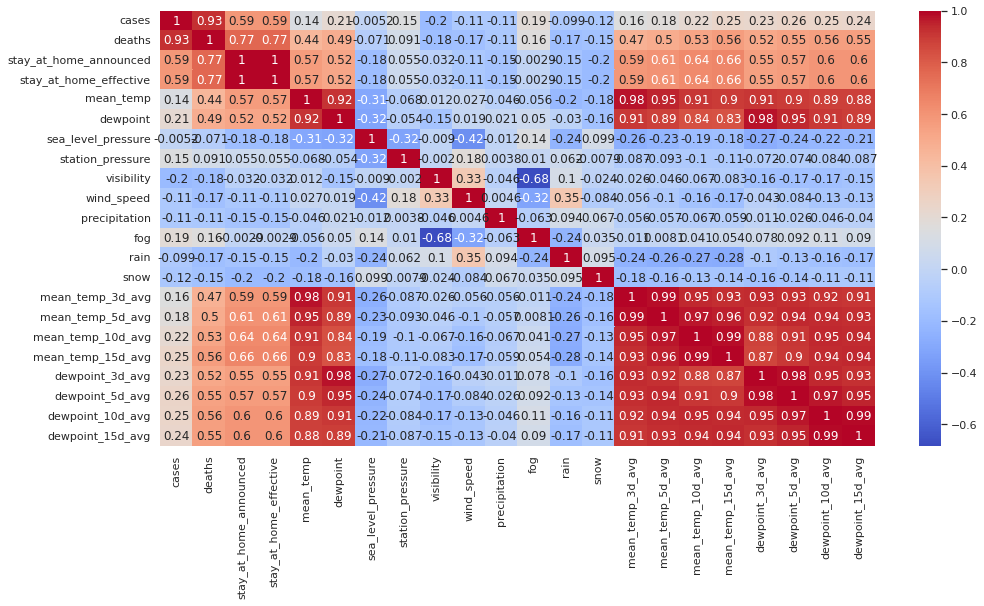

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                           cases    deaths  stay_at_home_announced  \
cases                   1.000000  0.926902                0.586744   
deaths                  0.926902  1.000000                0.767030   
stay_at_home_announced  0.586744  0.767030                1.000000   
stay_at_home_effective  0.586744  0.767030                1.000000   
mean_temp               0.136846  0.444634                0.567101   
dewpoint                0.212938  0.488660                0.524070   
sea_level_pressure      0.005243  0.070503                0.179464   
station_pressure        0.150244  0.090893                0.054713   
visibility              0.198659  0.181269                0.031972   
wind_speed              0.109153  0.166233                0.114378   
precipitation           0.106676  0.110803                0.148426   
fog                     0.188535  0.161362                0.002905   
rain                    0.098553  0.170329                0.147699   
snow                

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                        cases    deaths  stay_at_home_announced  \
cases                     NaN  0.926902                0.586744   
deaths                    NaN       NaN                0.767030   
stay_at_home_announced    NaN       NaN                     NaN   
stay_at_home_effective    NaN       NaN                     NaN   
mean_temp                 NaN       NaN                     NaN   
dewpoint                  NaN       NaN                     NaN   
sea_level_pressure        NaN       NaN                     NaN   
station_pressure          NaN       NaN                     NaN   
visibility                NaN       NaN                     NaN   
wind_speed                NaN       NaN                     NaN   
precipitation             NaN       NaN                     NaN   
fog                       NaN       NaN                     NaN   
rain                      NaN       NaN                     NaN   
snow                      NaN       NaN                     Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['stay_at_home_effective', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg']


In [ ]:
df = df.drop(columns=['stay_at_home_effective', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg'])

In [ ]:
test_split=round(len(df)*0.20)
df_for_training=df[:-63]
df_for_testing=df[-63:]
print(df_for_training.shape)
print(df_for_testing.shape)

(256, 13)
(63, 13)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.98671818, 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.99251389, 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,1)
testX,testY=createXY(df_for_testing_scaled,1)

In [ ]:
trainXS = trainX
trainXB = trainX
trainYS = trainY
trainYB = trainY
testXS = testX
testXB = testX
testYS = testY
testYB = testY

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (255, 1, 13)
trainY Shape--  (255,)


In [ ]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (62, 1, 13)
testY Shape--  (62,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.         0.         0.         0.27990971 0.4940048  0.05329154
  0.         0.98888889 0.44171779 0.10194805 0.         1.
  0.        ]]
trainY[0]--  0.0


In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/50
15/15 [==============================] - 9s 89ms/step - loss: 0.3494 - val_loss: 1.1546
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0624 - val_loss: 0.2733
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0396 - val_loss: 0.5373
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0285 - val_loss: 0.4280
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0210 - val_loss: 0.4467
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0190 - val_loss: 0.4083
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.3994
Epoch 8/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0165 - val_loss: 0.3925
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0140 - val_loss: 0.3338
Epoch 10/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0139 - val_loss: 0.3247
Epoch 11/50
15/15

In [ ]:
grid_search.best_params_

{'batch_size': 9, 'epochs': 100, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
prediction=my_model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[1.0201627]
 [1.0231314]
 [1.0387194]
 [1.0447469]
 [1.0444283]
 [1.0534184]
 [1.0718955]
 [1.0639029]
 [1.0727698]
 [1.09819  ]
 [1.1053865]
 [1.1209729]
 [1.128676 ]
 [1.1485739]
 [1.1418542]
 [1.1387767]
 [1.170682 ]
 [1.1758581]
 [1.1939889]
 [1.1849306]
 [1.210829 ]
 [1.1911834]
 [1.2040235]
 [1.2447101]
 [1.2501351]
 [1.2705201]
 [1.28306  ]
 [1.2765621]
 [1.2733978]
 [1.272104 ]
 [1.3050245]
 [1.3413261]
 [1.3647555]
 [1.3939625]
 [1.3955784]
 [1.3547074]
 [1.3830057]
 [1.4501411]
 [1.4967023]
 [1.4618385]
 [1.530387 ]
 [1.5389923]
 [1.5624689]
 [1.5651048]
 [1.6653967]
 [1.6239688]
 [1.6923615]
 [1.7383822]
 [1.7930084]
 [1.7777941]
 [1.7616079]
 [1.8791279]
 [1.9527627]
 [1.965176 ]
 [1.9788939]
 [1.9935414]
 [1.9872235]
 [1.9178729]
 [2.1433747]
 [2.171641 ]
 [2.1871457]
 [2.224346 ]]

Prediction Shape- (62, 1)


In [ ]:
prediction_copies_array = np.repeat(prediction,13, axis=-1)
prediction_copies_array

array([[1.0201627, 1.0201627, 1.0201627, 1.0201627, 1.0201627, 1.0201627,
        1.0201627, 1.0201627, 1.0201627, 1.0201627, 1.0201627, 1.0201627,
        1.0201627],
       [1.0231314, 1.0231314, 1.0231314, 1.0231314, 1.0231314, 1.0231314,
        1.0231314, 1.0231314, 1.0231314, 1.0231314, 1.0231314, 1.0231314,
        1.0231314],
       [1.0387194, 1.0387194, 1.0387194, 1.0387194, 1.0387194, 1.0387194,
        1.0387194, 1.0387194, 1.0387194, 1.0387194, 1.0387194, 1.0387194,
        1.0387194],
       [1.0447469, 1.0447469, 1.0447469, 1.0447469, 1.0447469, 1.0447469,
        1.0447469, 1.0447469, 1.0447469, 1.0447469, 1.0447469, 1.0447469,
        1.0447469],
       [1.0444283, 1.0444283, 1.0444283, 1.0444283, 1.0444283, 1.0444283,
        1.0444283, 1.0444283, 1.0444283, 1.0444283, 1.0444283, 1.0444283,
        1.0444283],
       [1.0534184, 1.0534184, 1.0534184, 1.0534184, 1.0534184, 1.0534184,
        1.0534184, 1.0534184, 1.0534184, 1.0534184, 1.0534184, 1.0534184,
        1.05

In [ ]:
prediction_copies_array.shape

(62, 13)

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),13)))[:,0]

In [ ]:
original_copies_array = np.repeat(testY,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),13)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [ 8449.987   8474.574   8603.675   8653.594   8650.956   8725.411
  8878.438   8812.243   8885.68    9096.209   9155.812   9284.897
  9348.695   9513.489   9457.836   9432.349   9696.588   9739.457
  9889.616   9814.595  10029.086   9866.382   9972.723  10309.689
 10354.619  10523.447  10627.303  10573.487  10547.28   10536.565
 10809.213  11109.863  11303.905  11545.798  11559.181  11220.687
 11455.054  12011.068  12396.688  12107.946  12675.666  12746.935
 12941.367  12963.198  13793.815  13450.71   14017.138  14398.281
 14850.696  14724.691  14590.637  15563.9375 16173.781  16276.588
 16390.2    16511.51   16459.186  15884.823  17752.428  17986.531
 18114.94   18423.031 ]

Original Values--  [ 8283.  8372.  8435.  8482.  8525.  8595.  8595.  8595.  8813.  8869.
  8951.  9047.  9125.  9125.  9125.  9322.  9402.  9478.  9562.  9659.
  9659.  9659.  9891.  9948. 10025. 10126. 10219. 10219. 10219. 10505.
 10587. 10723. 10877. 11129. 11129. 11129. 11609. 11747. 11747. 1201

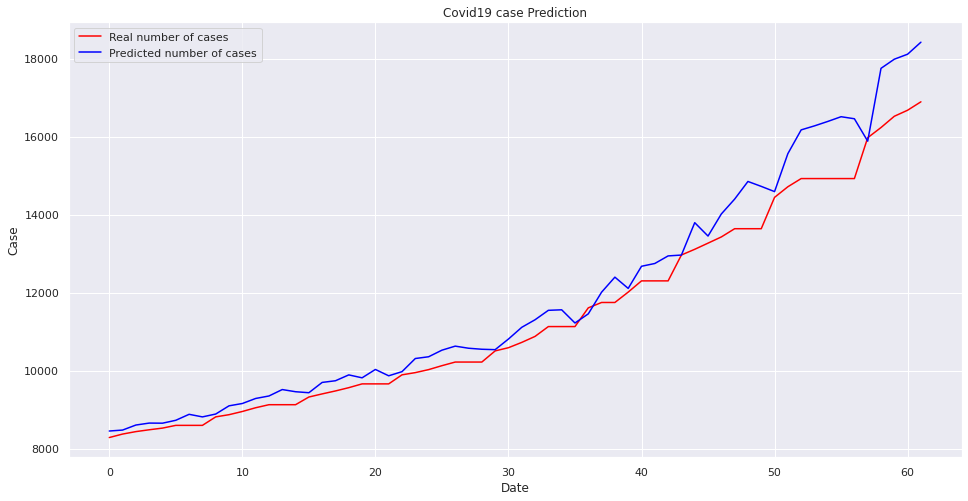

In [ ]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(original, pred)))
print("MAE:",metrics.mean_absolute_error(original, pred))
print("MSE:",metrics.mean_squared_error(original, pred))
print("MAPE: ",MAPE(original,pred))

RMSE : 673.3
MAE: 490.38750630040323
MSE: 453296.99225514935
MAPE:  3.8723558427893567


In [ ]:
forecast_errors = [original[i]-pred[i] for i in range(len(original))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(original)
print('Bias: %f' % bias)

Forecast Errors: [-166.9873046875, -102.57421875, -168.6748046875, -171.59375, -125.9560546875, -130.4111328125, -283.4384765625, -217.2431640625, -72.6796875, -227.208984375, -204.8115234375, -237.8974609375, -223.6953125, -388.4892578125, -332.8359375, -110.3486328125, -294.587890625, -261.45703125, -327.6162109375, -155.5947265625, -370.0859375, -207.3818359375, -81.72265625, -361.689453125, -329.619140625, -397.447265625, -408.302734375, -354.4873046875, -328.2802734375, -31.5654296875, -222.212890625, -386.86328125, -426.9052734375, -416.7978515625, -430.1806640625, -91.6865234375, 153.9462890625, -264.068359375, -649.6884765625, -94.9462890625, -374.666015625, -445.9345703125, -640.3671875, 1.8017578125, -682.8154296875, -181.7099609375, -589.1376953125, -759.28125, -1211.6962890625, -1085.69140625, -147.63671875, -848.9375, -1248.78125, -1351.587890625, -1465.19921875, -1586.509765625, -1534.185546875, 88.1767578125, -1518.427734375, -1463.53125, -1436.939453125, -1529.03125]
Bi

Stacked LSTM

In [ ]:
print("trainXS Shape-- ",trainXS.shape)
print("trainYS Shape-- ",trainYS.shape)

trainXS Shape--  (255, 1, 13)
trainYS Shape--  (255,)


In [ ]:
print("testXS Shape-- ",testXS.shape)
print("testYS Shape-- ",testYS.shape)

testXS Shape--  (62, 1, 13)
testYS Shape--  (62,)


In [ ]:
print("trainXS[0]-- \n",trainXS[0])
print("trainYS[0]-- ",trainYS[0])

trainXS[0]-- 
 [[0.         0.         0.         0.27990971 0.4940048  0.05329154
  0.         0.98888889 0.44171779 0.10194805 0.         1.
  0.        ]]
trainYS[0]--  0.0


In [ ]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


In [ ]:
grid_search_S = grid_search.fit(trainXS,trainYS)

Epoch 1/50
15/15 [==============================] - 5s 71ms/step - loss: 0.3479 - val_loss: 1.1733
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0817 - val_loss: 0.3354
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0339 - val_loss: 0.5701
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0310 - val_loss: 0.4868
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0225 - val_loss: 0.4508
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0200 - val_loss: 0.4378
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0175 - val_loss: 0.4174
Epoch 8/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0171 - val_loss: 0.3739
Epoch 9/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0130 - val_loss: 0.3638
Epoch 10/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0132 - val_loss: 0.2850
Epoch 11/50
15/15

In [ ]:
grid_search_S.best_params_

{'batch_size': 9, 'epochs': 100, 'optimizer': 'adam'}

In [ ]:
my_s_model=grid_search_S.best_estimator_.model

In [ ]:
predictionS =my_s_model.predict(testXS)
print("prediction\n", predictionS)
print("\nPrediction Shape-",predictionS.shape)

prediction
 [[0.9937707 ]
 [0.99183965]
 [1.0036756 ]
 [1.013378  ]
 [1.0158756 ]
 [1.0232041 ]
 [1.0463347 ]
 [1.0053754 ]
 [1.0452236 ]
 [1.0714093 ]
 [1.0780436 ]
 [1.0888094 ]
 [1.0937479 ]
 [1.1145396 ]
 [1.1116174 ]
 [1.1125506 ]
 [1.1397337 ]
 [1.1436195 ]
 [1.1627661 ]
 [1.1499933 ]
 [1.1773424 ]
 [1.1627156 ]
 [1.1651058 ]
 [1.2052077 ]
 [1.21361   ]
 [1.2364548 ]
 [1.2496845 ]
 [1.2454118 ]
 [1.2347295 ]
 [1.2358872 ]
 [1.2707702 ]
 [1.3107977 ]
 [1.3305568 ]
 [1.3589202 ]
 [1.3618976 ]
 [1.3390319 ]
 [1.3469172 ]
 [1.4105157 ]
 [1.4594487 ]
 [1.431131  ]
 [1.4921943 ]
 [1.4702893 ]
 [1.524913  ]
 [1.5298938 ]
 [1.6268505 ]
 [1.5577744 ]
 [1.61829   ]
 [1.695024  ]
 [1.7418021 ]
 [1.7314923 ]
 [1.7209169 ]
 [1.8381335 ]
 [1.9034463 ]
 [1.9203042 ]
 [1.9308496 ]
 [1.9391104 ]
 [1.9362881 ]
 [1.8839902 ]
 [2.0909073 ]
 [2.118465  ]
 [2.1446779 ]
 [2.1769218 ]]

Prediction Shape- (62, 1)


In [ ]:
prediction_copies_array_S = np.repeat(predictionS,13, axis=-1)
prediction_copies_array_S

array([[0.9937707 , 0.9937707 , 0.9937707 , 0.9937707 , 0.9937707 ,
        0.9937707 , 0.9937707 , 0.9937707 , 0.9937707 , 0.9937707 ,
        0.9937707 , 0.9937707 , 0.9937707 ],
       [0.99183965, 0.99183965, 0.99183965, 0.99183965, 0.99183965,
        0.99183965, 0.99183965, 0.99183965, 0.99183965, 0.99183965,
        0.99183965, 0.99183965, 0.99183965],
       [1.0036756 , 1.0036756 , 1.0036756 , 1.0036756 , 1.0036756 ,
        1.0036756 , 1.0036756 , 1.0036756 , 1.0036756 , 1.0036756 ,
        1.0036756 , 1.0036756 , 1.0036756 ],
       [1.013378  , 1.013378  , 1.013378  , 1.013378  , 1.013378  ,
        1.013378  , 1.013378  , 1.013378  , 1.013378  , 1.013378  ,
        1.013378  , 1.013378  , 1.013378  ],
       [1.0158756 , 1.0158756 , 1.0158756 , 1.0158756 , 1.0158756 ,
        1.0158756 , 1.0158756 , 1.0158756 , 1.0158756 , 1.0158756 ,
        1.0158756 , 1.0158756 , 1.0158756 ],
       [1.0232041 , 1.0232041 , 1.0232041 , 1.0232041 , 1.0232041 ,
        1.0232041 , 1.02320

In [ ]:
prediction_copies_array_S.shape

(62, 13)

In [ ]:
predS=scaler.inverse_transform(np.reshape(prediction_copies_array_S,(len(predictionS),13)))[:,0]

In [ ]:
original_copies_array_S = np.repeat(testYS,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS),13)))[:,0]

In [ ]:
print("Pred Values-- " ,predS)
print("\nOriginal Values-- " ,originalS)

Pred Values--  [ 8231.409  8215.416  8313.441  8393.797  8414.481  8475.177  8666.744
  8327.52   8657.542  8874.412  8929.357  9018.52   9059.42   9231.617
  9207.416  9215.145  9440.274  9472.457  9631.029  9525.245  9751.75
  9630.61   9650.406  9982.53  10052.118 10241.319 10350.887 10315.5
 10227.03  10236.617 10525.519 10857.026 11020.671 11255.577 11280.236
 11090.862 11156.168 11682.891 12088.154 11853.627 12359.354 12177.937
 12630.329 12671.58  13474.576 12902.488 13403.678 14039.189 14426.605
 14341.219 14253.634 15224.422 15765.343 15904.959 15992.296 16060.713
 16037.338 15604.207 17317.895 17546.125 17763.22  18030.266]

Original Values--  [ 8283.  8372.  8435.  8482.  8525.  8595.  8595.  8595.  8813.  8869.
  8951.  9047.  9125.  9125.  9125.  9322.  9402.  9478.  9562.  9659.
  9659.  9659.  9891.  9948. 10025. 10126. 10219. 10219. 10219. 10505.
 10587. 10723. 10877. 11129. 11129. 11129. 11609. 11747. 11747. 12013.
 12301. 12301. 12301. 12965. 13111. 13269. 13428. 1363

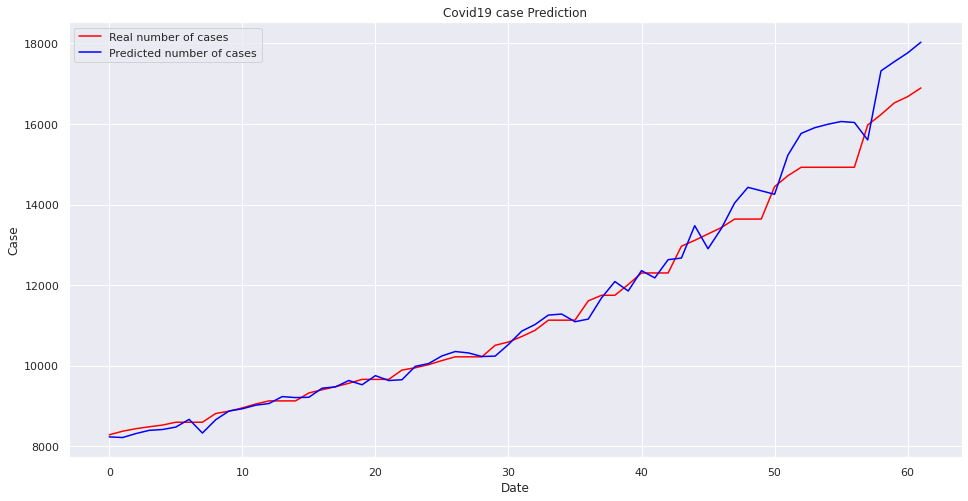

In [ ]:
plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalS, predS)))
print("MAE:",metrics.mean_absolute_error(originalS, predS))
print("MSE:",metrics.mean_squared_error(originalS, predS))
print("MAPE: ",MAPE(originalS,predS))

RMSE : 459
MAE: 298.4353421118952
MSE: 210642.9146120779
MAPE:  2.242955176628338


In [ ]:
forecast_errorS = [originalS[i]-predS[i] for i in range(len(originalS))]
print('Forecast Errors: %s' % forecast_errorS)
biaS = sum(forecast_errorS) * 1.0/len(originalS)
print('Bias: %f' % biaS)

Forecast Errors: [51.5908203125, 156.583984375, 121.55859375, 88.203125, 110.5185546875, 119.8232421875, -71.744140625, 267.48046875, 155.4580078125, -5.412109375, 21.642578125, 28.48046875, 65.580078125, -106.6171875, -82.416015625, 106.85546875, -38.2744140625, 5.54296875, -69.029296875, 133.7548828125, -92.75, 28.3896484375, 240.59375, -34.5302734375, -27.1181640625, -115.3193359375, -131.88671875, -96.5, -8.0302734375, 268.3828125, 61.4814453125, -134.0263671875, -143.6708984375, -126.5771484375, -151.236328125, 38.1376953125, 452.83203125, 64.109375, -341.154296875, 159.373046875, -58.353515625, 123.0634765625, -329.3291015625, 293.419921875, -363.576171875, 366.51171875, 24.322265625, -400.189453125, -787.60546875, -702.21875, 189.3662109375, -509.421875, -840.3427734375, -979.958984375, -1067.2958984375, -1135.712890625, -1112.337890625, 368.79296875, -1083.89453125, -1023.125, -1085.220703125, -1136.265625]
Bias: -165.795032


Bi-Directional LSTM

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [ ]:
print("trainXB Shape-- ",trainXB.shape)
print("trainYB Shape-- ",trainYB.shape)

trainXB Shape--  (255, 1, 13)
trainYB Shape--  (255,)


In [ ]:
print("testXB Shape-- ",testXB.shape)
print("testYB Shape-- ",testYB.shape)

testXB Shape--  (62, 1, 13)
testYB Shape--  (62,)


In [ ]:
print("trainXB[0]-- \n",trainXB[0])
print("trainYB[0]-- ",trainYB[0])

trainXB[0]-- 
 [[0.         0.         0.         0.27990971 0.4940048  0.05329154
  0.         0.98888889 0.44171779 0.10194805 0.         1.
  0.        ]]
trainYB[0]--  0.0


In [ ]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


In [ ]:
grid_search_B = grid_search.fit(trainXB,trainYB)

Epoch 1/50
15/15 [==============================] - 7s 92ms/step - loss: 0.3591 - val_loss: 1.1371
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0710 - val_loss: 0.2732
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0301 - val_loss: 0.5293
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0271 - val_loss: 0.4342
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0201 - val_loss: 0.4222
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0164 - val_loss: 0.4055
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0156 - val_loss: 0.3728
Epoch 8/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0141 - val_loss: 0.3521
Epoch 9/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0147 - val_loss: 0.3140
Epoch 10/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0112 - val_loss: 0.3120
Epoch 11/50
15/1

In [ ]:
grid_search_B.best_params_

{'batch_size': 11, 'epochs': 100, 'optimizer': 'adam'}

In [ ]:
my_B_model=grid_search_B.best_estimator_.model

In [ ]:
predictionB =my_B_model.predict(testXB)
print("prediction\n", predictionB)
print("\nPrediction Shape-",predictionB.shape)

prediction
 [[0.97902304]
 [0.9775633 ]
 [0.9887886 ]
 [0.9994567 ]
 [1.0022591 ]
 [1.0102506 ]
 [1.0168176 ]
 [1.0320162 ]
 [1.0076836 ]
 [1.0315953 ]
 [1.040868  ]
 [1.0525777 ]
 [1.055766  ]
 [1.0757508 ]
 [1.0636427 ]
 [1.0800827 ]
 [1.0909777 ]
 [1.1071267 ]
 [1.1246105 ]
 [1.1325678 ]
 [1.142556  ]
 [1.1453148 ]
 [1.1263736 ]
 [1.1566553 ]
 [1.171344  ]
 [1.1977359 ]
 [1.2050949 ]
 [1.223094  ]
 [1.2179718 ]
 [1.2153988 ]
 [1.2523799 ]
 [1.2819505 ]
 [1.2952325 ]
 [1.3242947 ]
 [1.3303943 ]
 [1.3189883 ]
 [1.3226575 ]
 [1.3728907 ]
 [1.4234264 ]
 [1.4111905 ]
 [1.4496528 ]
 [1.5215936 ]
 [1.4917892 ]
 [1.4961258 ]
 [1.5950303 ]
 [1.6272519 ]
 [1.6670938 ]
 [1.6692779 ]
 [1.709975  ]
 [1.6923008 ]
 [1.6804348 ]
 [1.8035913 ]
 [1.8785496 ]
 [1.8851874 ]
 [1.8895218 ]
 [1.907969  ]
 [1.8959494 ]
 [1.8651822 ]
 [2.072102  ]
 [2.0899987 ]
 [2.131203  ]
 [2.1520977 ]]

Prediction Shape- (62, 1)


In [ ]:
prediction_copies_array_B = np.repeat(predictionB,13, axis=-1)
prediction_copies_array_B

array([[0.97902304, 0.97902304, 0.97902304, 0.97902304, 0.97902304,
        0.97902304, 0.97902304, 0.97902304, 0.97902304, 0.97902304,
        0.97902304, 0.97902304, 0.97902304],
       [0.9775633 , 0.9775633 , 0.9775633 , 0.9775633 , 0.9775633 ,
        0.9775633 , 0.9775633 , 0.9775633 , 0.9775633 , 0.9775633 ,
        0.9775633 , 0.9775633 , 0.9775633 ],
       [0.9887886 , 0.9887886 , 0.9887886 , 0.9887886 , 0.9887886 ,
        0.9887886 , 0.9887886 , 0.9887886 , 0.9887886 , 0.9887886 ,
        0.9887886 , 0.9887886 , 0.9887886 ],
       [0.9994567 , 0.9994567 , 0.9994567 , 0.9994567 , 0.9994567 ,
        0.9994567 , 0.9994567 , 0.9994567 , 0.9994567 , 0.9994567 ,
        0.9994567 , 0.9994567 , 0.9994567 ],
       [1.0022591 , 1.0022591 , 1.0022591 , 1.0022591 , 1.0022591 ,
        1.0022591 , 1.0022591 , 1.0022591 , 1.0022591 , 1.0022591 ,
        1.0022591 , 1.0022591 , 1.0022591 ],
       [1.0102506 , 1.0102506 , 1.0102506 , 1.0102506 , 1.0102506 ,
        1.0102506 , 1.01025

In [ ]:
prediction_copies_array_B.shape

(62, 13)

In [ ]:
predB=scaler.inverse_transform(np.reshape(prediction_copies_array_B,(len(predictionB),13)))[:,0]

In [ ]:
original_copies_array_B = np.repeat(testYB,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB),13)))[:,0]

In [ ]:
print("Pred Values-- " ,predB)
print("\nOriginal Values-- " ,originalB)

Pred Values--  [ 8109.269   8097.1797  8190.1475  8278.501   8301.71    8367.8955
  8422.283   8548.158   8346.636   8544.673   8621.47    8718.449
  8744.8545  8910.368   8810.089   8946.245   9036.478   9170.224
  9315.024   9380.927   9463.648   9486.497   9329.627   9580.419
  9702.071   9920.648   9981.597  10130.664  10088.242  10066.933
 10373.21   10618.114  10728.116  10968.809  11019.325  10924.861
 10955.249  11371.281  11789.817  11688.4795 12007.024  12602.838
 12355.998  12391.914  13211.041  13477.9    13807.87   13825.96
 14163.013  14016.636  13918.361  14938.343  15559.147  15614.122
 15650.02   15802.8    15703.253  15448.438  17162.148  17310.37
 17651.621  17824.672 ]

Original Values--  [ 8283.  8372.  8435.  8482.  8525.  8595.  8595.  8595.  8813.  8869.
  8951.  9047.  9125.  9125.  9125.  9322.  9402.  9478.  9562.  9659.
  9659.  9659.  9891.  9948. 10025. 10126. 10219. 10219. 10219. 10505.
 10587. 10723. 10877. 11129. 11129. 11129. 11609. 11747. 11747. 12013

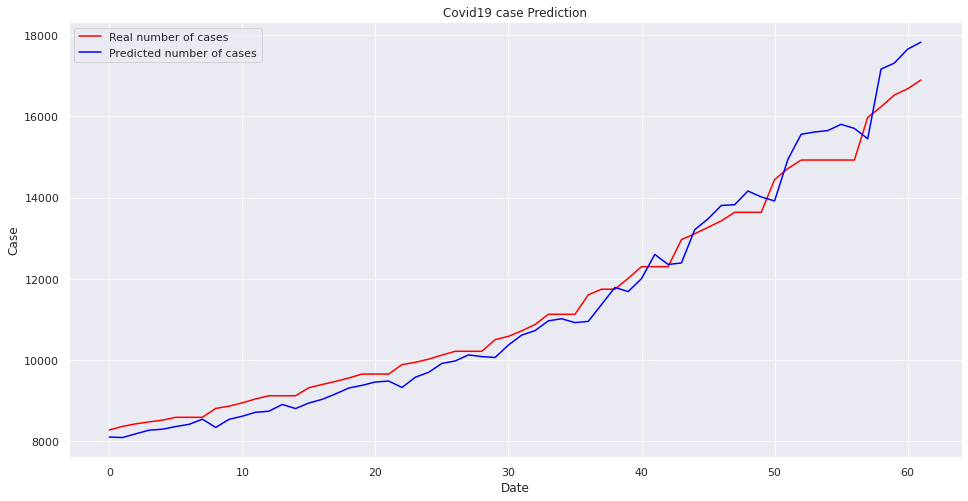

In [ ]:
plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalB, predB)))
print("MAE:",metrics.mean_absolute_error(originalB, predB))
print("MSE:",metrics.mean_squared_error(originalB, predB))
print("MAPE: ",MAPE(originalB,predB))

RMSE : 426.6
MAE: 357.34608902469756
MSE: 181981.32421017077
MAPE:  3.0142813081514603


In [ ]:
forecast_errorB = [originalB[i]-predB[i] for i in range(len(originalB))]
print('Forecast Errors: %s' % forecast_errorB)
biasB = sum(forecast_errorB) * 1.0/len(originalB)
print('Bias: %f' % biasB)

Forecast Errors: [173.73095703125, 274.8203125, 244.8525390625, 203.4990234375, 223.2900390625, 227.1044921875, 172.716796875, 46.841796875, 466.3642578125, 324.3271484375, 329.5302734375, 328.55078125, 380.1455078125, 214.6318359375, 314.9111328125, 375.7548828125, 365.5224609375, 307.7763671875, 246.9755859375, 278.0732421875, 195.3515625, 172.5029296875, 561.373046875, 367.5810546875, 322.9287109375, 205.3515625, 237.4033203125, 88.3359375, 130.7578125, 438.0673828125, 213.7900390625, 104.8857421875, 148.8837890625, 160.19140625, 109.6748046875, 204.138671875, 653.7509765625, 375.71875, -42.8173828125, 324.5205078125, 293.9755859375, -301.837890625, -54.998046875, 573.0859375, -100.041015625, -208.900390625, -379.8701171875, -186.9599609375, -524.0126953125, -377.6357421875, 524.638671875, -223.3427734375, -634.1474609375, -689.1220703125, -725.01953125, -877.7998046875, -778.2529296875, 524.5615234375, -928.1484375, -787.369140625, -973.62109375, -930.671875]
Bias: 43.650335
